In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()

/home/dulab/anaconda3/envs/pythonProject1/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

In [3]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
        transforms.RandomRotation(degrees=(0, 180)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


In [4]:
data_dir = '/home/dulab/Downloads/transfer_learning/vgg16'

test_datasets1 = datasets.ImageFolder(os.path.join(data_dir, 'carpet'), data_transforms['test'])
test_dataloader1 = torch.utils.data.DataLoader(test_datasets1, batch_size=32, shuffle=True, num_workers=4)

test_datasets2 = datasets.ImageFolder(os.path.join(data_dir, 'transistor'), data_transforms['test'])
test_dataloader2 = torch.utils.data.DataLoader(test_datasets2, batch_size=32, shuffle=True, num_workers=4)

test_datasets3 = datasets.ImageFolder(os.path.join(data_dir, 'bottle'), data_transforms['test'])
test_dataloader3 = torch.utils.data.DataLoader(test_datasets3, batch_size=32, shuffle=True, num_workers=4)

test_datasets4 = datasets.ImageFolder(os.path.join(data_dir, 'tile'), data_transforms['test'])
test_dataloader4 = torch.utils.data.DataLoader(test_datasets4, batch_size=32, shuffle=True, num_workers=4)

test_datasets5 = datasets.ImageFolder(os.path.join(data_dir, 'pill'), data_transforms['test'])
test_dataloader5 = torch.utils.data.DataLoader(test_datasets5, batch_size=32, shuffle=True, num_workers=4)

In [5]:
def evaluation(model, dataloader):
    model.eval()
    dataset_size = len(dataloader.dataset)
    running_loss = 0.0
    running_corrects = 0
    
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
                
        # zero the parameter gradients
#         optimizer.zero_grad()

        # forward
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / dataset_size
    epoch_acc = running_corrects.double() / dataset_size
    return epoch_acc, epoch_loss

In [6]:
criterion = nn.CrossEntropyLoss()

In [7]:
save_dir = '/home/dulab/Downloads/transfer_learning/vgg16/model/vgg_aug_sche'
model = []
model.append(torch.load(os.path.join(save_dir,'vgg.pth')))
model.append(torch.load(os.path.join(save_dir, 'vgg1.pth'))) 
model.append(torch.load(os.path.join(save_dir, 'vgg2.pth')))
model.append(torch.load(os.path.join(save_dir, 'vgg3.pth')))
model.append(torch.load(os.path.join(save_dir, 'vgg4.pth')))
model.append(torch.load(os.path.join(save_dir, 'vgg5.pth')))

In [8]:
carpet_test_acc = []
for i in range(6):
    test_acc, _ = evaluation(model[i], test_dataloader1)
    print(f'Test acc: {test_acc:.4f}')
    carpet_test_acc.append(test_acc.item())

Test acc: 0.9596
Test acc: 0.9318
Test acc: 0.9116
Test acc: 0.9596
Test acc: 0.9141
Test acc: 0.8687


In [9]:
carpet_test_acc

[0.9595959595959597,
 0.9318181818181819,
 0.9116161616161617,
 0.9595959595959597,
 0.9141414141414143,
 0.8686868686868687]

In [10]:
tran_test_acc = []
for i in range(6):
    test_acc, _ = evaluation(model[i], test_dataloader2)
    print(f'Test acc: {test_acc:.4f}')
    tran_test_acc.append(test_acc.item())

Test acc: 0.1278
Test acc: 0.1278
Test acc: 0.1278
Test acc: 0.1278
Test acc: 0.1278
Test acc: 0.1278


In [11]:
bot_test_acc = []
for i in range(6):
    test_acc, _ = evaluation(model[i], test_dataloader3)
    print(f'Test acc: {test_acc:.4f}')
    bot_test_acc.append(test_acc.item())

Test acc: 0.2192
Test acc: 0.7397
Test acc: 0.2158
Test acc: 0.2158
Test acc: 0.2158
Test acc: 0.2158


In [12]:
tile_test_acc = []
for i in range(6):
    test_acc, _ = evaluation(model[i], test_dataloader4)
    print(f'Test acc: {test_acc:.4f}')
    tile_test_acc.append(test_acc.item())

Test acc: 0.2421
Test acc: 0.2421
Test acc: 0.3458
Test acc: 0.2421
Test acc: 0.3804
Test acc: 0.2421


In [13]:
pill_test_acc = []
for i in range(6):
    test_acc, _ = evaluation(model[i], test_dataloader5)
    print(f'Test acc: {test_acc:.4f}')
    pill_test_acc.append(test_acc.item())

Test acc: 0.3226
Test acc: 0.3226
Test acc: 0.3226
Test acc: 0.3157
Test acc: 0.3134
Test acc: 0.3203


In [14]:
Y = [carpet_test_acc,
     tran_test_acc,
     bot_test_acc,
     tile_test_acc,
     pill_test_acc]

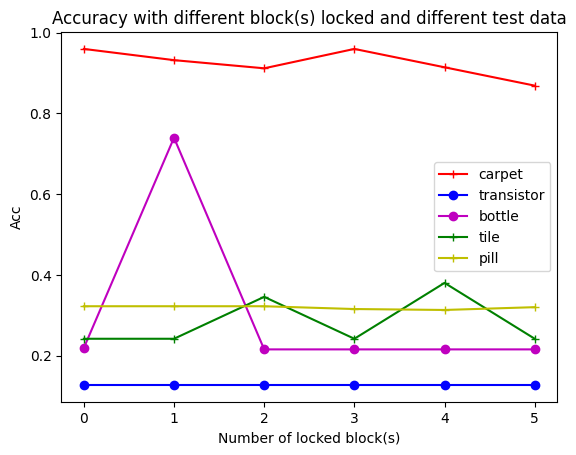

In [15]:
x = np.arange(6)
plt.plot(x, Y[0], 'r-+', label='carpet')
plt.plot(x, Y[1], 'b-o', label='transistor')  
plt.plot(x, Y[2], 'm-o', label='bottle')
plt.plot(x, Y[3], 'g-+', label='tile')
plt.plot(x, Y[4], 'y-+', label='pill')
plt.ylabel('Acc')
plt.xlabel('Number of locked block(s)')
title = 'Accuracy with different block(s) locked and different test data'
plt.title(title)
plt.legend()
plt.show()